IMPORTING THE DEPENDENCIES

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

LOADING THE DATASET

In [ ]:
data = pd.read_csv('/content/CarPrice_Assignment.csv')

In [ ]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

SELECTING THE RELEVANT FEATURES AND TARGET VARIABLE

In [ ]:
data['CarName'] = data['CarName'].apply(lambda x: x.split()[0])


In [ ]:
CarName_dict = {'audi': 1, 'bmw': 2, 'chevrolet': 3, 'dodge': 4, 'ford': 5, 'honda': 6, 'hyundai': 7, 'jeep': 8, 'mazda': 9, 'mercedes-benz': 10, 'nissan': 11, 'subaru': 12, 'toyota': 13, 'volkswagen': 14, 'volvo': 15}


In [ ]:
data['CarName'] = data['CarName'].map(CarName_dict)


In [ ]:
fueltype_dict = {'gas': 1, 'diesel': 2}

In [ ]:
data['fueltype'] = data['fueltype'].map(fueltype_dict)


In [ ]:
enginetype_dict = {'ohc': 1, 'dohc': 2, 'rotor': 3}

In [ ]:
data['enginetype'] = data['enginetype'].map(enginetype_dict)

In [ ]:
X = data[['CarName', 'fueltype', 'enginetype', 'enginesize', 'horsepower']]
y = data['price']

SPLITTING THE DATA INTO TRAINING AND TEST SETS

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
imputer = SimpleImputer(strategy='median')

In [ ]:
imputer.fit(X_train)

SimpleImputer(strategy='median')

In [ ]:
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

CREATING THE MULTIPLE LINEAR REGRESSION MODEL



In [ ]:
model = LinearRegression()

TRAINING THE MODEL ON THE TRAINING DATA

In [ ]:
model.fit(X_train_imputed, y_train)

LinearRegression()

EVALUATING THE MODEL ON THE TEST DATA

In [ ]:
y_pred = model.predict(X_test_imputed)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 10761347.955041362
R-squared: 0.8636838124644555


VISUALISING THE RELATIONSHIP BETWEEN THE PREDICTED AND ACTUAL PRICES

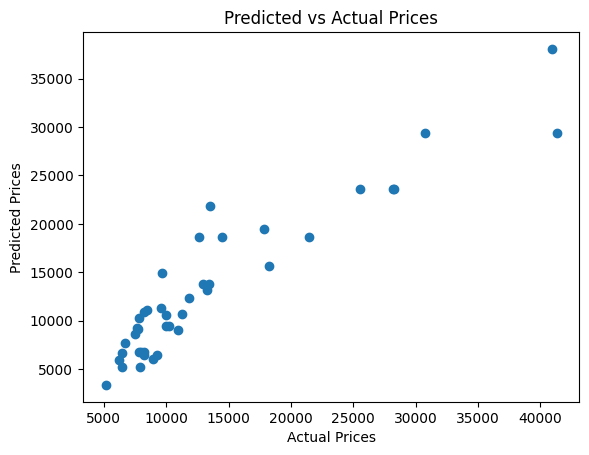

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.show()

MAKING PREDICTIONS ON NEW DATA

In [ ]:
new_data = [[10, 80, 2, 2.0, 150]]
new_data_imputed = imputer.transform(new_data)
predicted_price = model.predict(new_data_imputed)
print(f'Predicted Price: {predicted_price[0]}')

Predicted Price: 284522.07807572896


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
